# Visualizing Block Cross Validation

Here, I generated figures that show (1) where the train and test data are and (2) the location of the points in a cluster (out of 50).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from src.utils import (
    load_dataset,
    create_folds,
    standardize_data,
    generate_data,
    create_weight_matrix,
)

In [7]:
kf = 5

data_dir = "../data/boston"
window_size = 25
data = load_dataset(data_dir, window_size, "boston")
k_folds = 5
k_folds_size = 5
folds = create_folds(data, k_folds * k_folds_size)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
fold = 1

low_bound = fold * k_folds_size
upper_bound = (fold + 1) * k_folds_size
train_idx = np.where((folds < low_bound) | (folds >= upper_bound))[0]
val_idx = np.where((folds >= low_bound) & (folds < upper_bound))[0]

(279.65, 2223.35, -2991.45, -363.55)

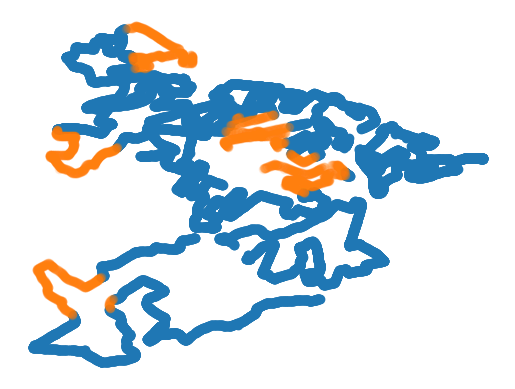

In [9]:

plt.scatter(data.coords[train_idx, 1], -data.coords[train_idx, 0], label='train')
plt.scatter(data.coords[val_idx, 1], -data.coords[val_idx, 0], label='val', alpha=0.1)
# plt.legend()
plt.axis('off')

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import rasterio as rio
import cartopy.crs as ccrs
import geopandas as gpd

In [13]:
temp = gpd.read_file('../data/traversal/Boston_ev.shp')

In [14]:
temp.geometry.x

0       -71.064607
1       -71.064572
2       -71.064543
3       -71.064522
4       -71.064503
           ...    
20242   -71.120802
20243   -71.120838
20244   -71.120880
20245   -71.120920
20246   -71.120950
Length: 20247, dtype: float64

In [15]:

from sklearn.cluster import KMeans
def create_folds(data, k_folds):
    # Cluster the coordinates
    km = KMeans(n_clusters=k_folds, random_state=42)
    km.fit(data.geometry)

    # Return the labels
    return km.labels_

In [16]:
coords = np.dstack([temp.geometry.x, temp.geometry.y])

In [17]:
km = KMeans(n_clusters=50, random_state=42)

km.fit(coords.reshape(-1, 2))

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=50, random_state=42)

In [27]:
np.unique(km.labels_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [28]:
temp.geometry.x[km.labels_ < 40]

0       -71.064607
1       -71.064572
2       -71.064543
3       -71.064522
4       -71.064503
           ...    
20242   -71.120802
20243   -71.120838
20244   -71.120880
20245   -71.120920
20246   -71.120950
Length: 16209, dtype: float64

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<Figure size 1000x1000 with 0 Axes>

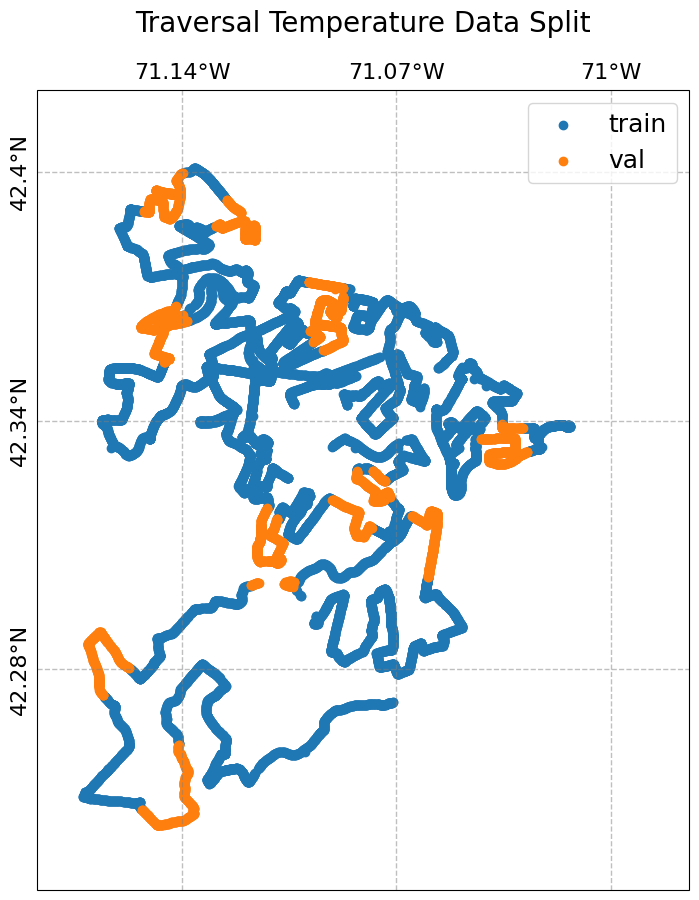

In [34]:
# Import mticket
import matplotlib.ticker as mticker


base_path = '../data/boston/'
with rio.open(os.path.join(base_path, 'boston_temp.tif')) as src:
    bounds = src.bounds

fig = plt.figure(figsize=(10,10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)

# ax = plt.axes(projection=ccrs.epsg(3857))#, extent=img_extent)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.0, -71.07, -71.14, -71.21])
gl.ylocator = mticker.FixedLocator([42.22, 42.28, 42.34, 42.4])

# Convert from EPSG: 4326 to EPSG: 3857
temp = temp.to_crs(epsg=3857)

train = ax.scatter(temp.geometry.x[km.labels_ < 40], temp.geometry.y[km.labels_ < 40], label='train')
test = ax.scatter(temp.geometry.x[km.labels_ >= 40], temp.geometry.y[km.labels_ >= 40], label='val')
plt.legend(fontsize=18)
# cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])

# cbar = fig.colorbar(ig, cax=cbar_ax, orientation='horizontal')#, pad=0.05, shrink=0.8)
# cbar.ax.tick_params(labelsize=16)
# cbar.ax.set_xlabel(fontsize=24)
ax.set_xlim(bounds.left+2000, bounds.right-2000)
ax.set_ylim(bounds.bottom+2000, bounds.top-2000)
# plt.xlabel('Longitude', fontsize=24)
# plt.ylabel('Latitude', fontsize=24)

fig.suptitle('Traversal Temperature Data Split', fontsize=20)

# Save the figure
plt.savefig('../figures/block_vc.png', dpi=300, bbox_inches='tight')

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


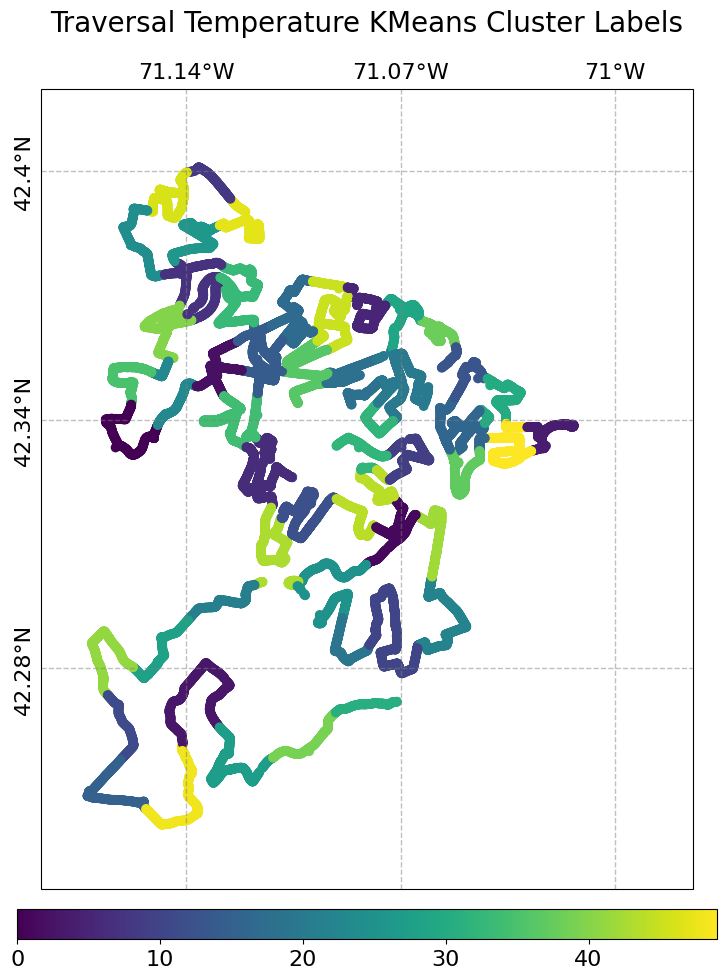

In [43]:
# First, visualize the temperature dataset
# plt.figure(figsize=(10,10))
# Import mticket
import matplotlib.ticker as mticker


base_path = '../data/boston'
with rio.open(os.path.join(base_path, 'boston_temp.tif')) as src:
    bounds = src.bounds

fig = plt.figure(figsize=(10,10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=ccrs.epsg(3857))#, extent=img_extent)

# ax = plt.axes(projection=ccrs.epsg(3857))#, extent=img_extent)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--', ylabel_style={'size': 16, 'rotation': 'vertical'}, xlabel_style={'size': 16})
# Remove edge effects for a better visual
gl.xlabels_bottom = False
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator([-71.0, -71.07, -71.14, -71.21])
gl.ylocator = mticker.FixedLocator([42.22, 42.28, 42.34, 42.4])

# Convert from EPSG: 4326 to EPSG: 3857
temp = temp.to_crs(epsg=3857)

ig = ax.scatter(temp.geometry.x, temp.geometry.y, c=km.labels_) #label='train')
# ax.scatter(temp.geometry.x[km.labels_ >= 40], temp.geometry.y[km.labels_ >= 40], label='val')
# plt.legend(fontsize=18)
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.03])

cbar = fig.colorbar(ig, cax=cbar_ax, orientation='horizontal')#, pad=0.05, shrink=0.8)
cbar.ax.tick_params(labelsize=16)
# cbar.ax.set_xlabel(fontsize=24)
ax.set_xlim(bounds.left+2000, bounds.right-2000)
ax.set_ylim(bounds.bottom+2000, bounds.top-2000)
# plt.xlabel('Longitude', fontsize=24)
# plt.ylabel('Latitude', fontsize=24)

fig.suptitle('Traversal Temperature KMeans Cluster Labels', fontsize=20)

# Save the figure
plt.savefig('../figures/kmeans_labels.png', dpi=300, bbox_inches='tight')